In [6]:
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

In [7]:

def grad_batch(f, batch_size):
    def grad_help(*args):
        h = 1e-5
        dim = len(args)
        batch = set(np.random.choice(np.arange(dim), batch_size, replace=False))
        return [0 if i not in batch else
                (f(*[args[j] + (h if j == i else 0) for j in range(dim)])
                - f(*[args[j] - (h if j == i else 0) for j in range(dim)]))
                /(2*h)
                for i in range(dim)]
    return grad_help

def distance_point(line, point):
    a = np.array(line[:2])
    n = np.array(line[2:])
    return np.linalg.norm((point-a) - (point-a).dot(n)*n)

def distance(line, points):
    return sum(distance_point(line, point) for point in points)

def sgd(f, lr0, d, epoch, x):
    points = np.zeros((epoch, 2))
    points[0] = x
    for i in range(1, epoch):
        x = x - lr0*np.exp(-d*i) * np.array(grad_batch(f, 1)(*x))
        points[i] = x
    return points


In [8]:
def regression(x, y, lr = 0.01, ):
    if x.ndim == 1:
        x_mat = np.array([np.full(len(x), 1), x]).T
        k = 2
    else:
        x_mat = np.insert(x, 0, 1, axis=1)
        k = len(np.array(x[0])) + 1
    f = lambda *b: np.linalg.norm((y - x_mat.dot(np.array(b)))**2)
    bs = sgd(f, 0.01, 0.01, 100, np.full(k, 1))
    # print(bs)
    # line = lambda *z: np.insert(z,0,1).dot(bs[-1])

    # points = gradient_descent(f, lr0, d, epoch, x)
    ax = plt.figure().add_subplot()
    X = np.arange(len(bs))
    ax.plot(X, np.vectorize(f)(*bs.T))
    ax.grid()

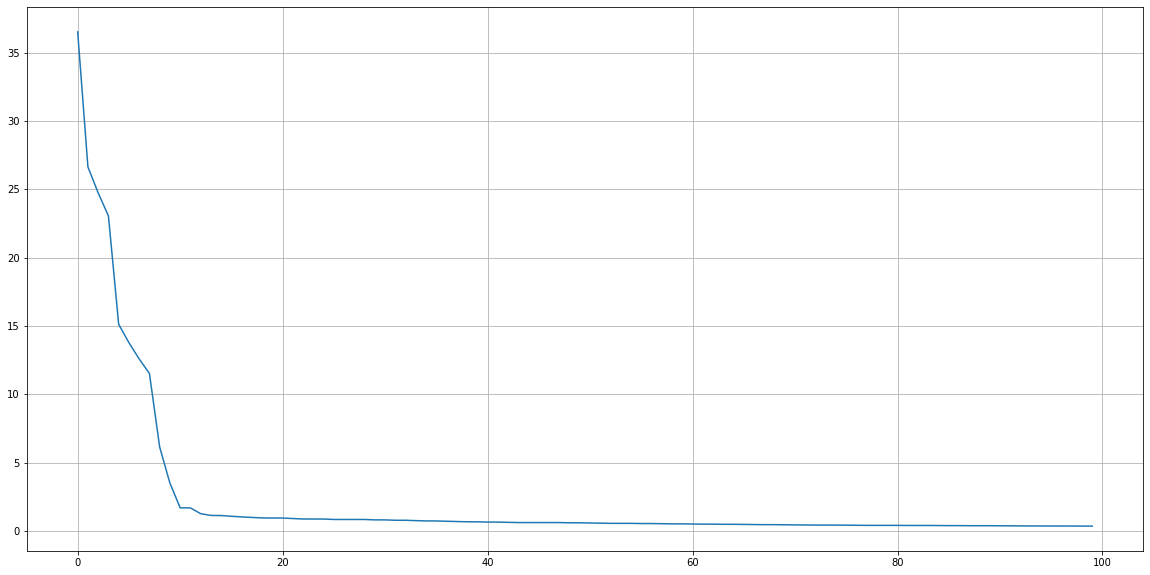

In [10]:
x, y = np.array([-1,0,1,2, 3, 4, 5, 6, 7, 8]), np.array([0, 0,1,1, 2, 2, 3, 3, 4, 4])
 

regression(x,y)

In [12]:
print(10*x)

[-10   0  10  20  30  40  50  60  70  80]


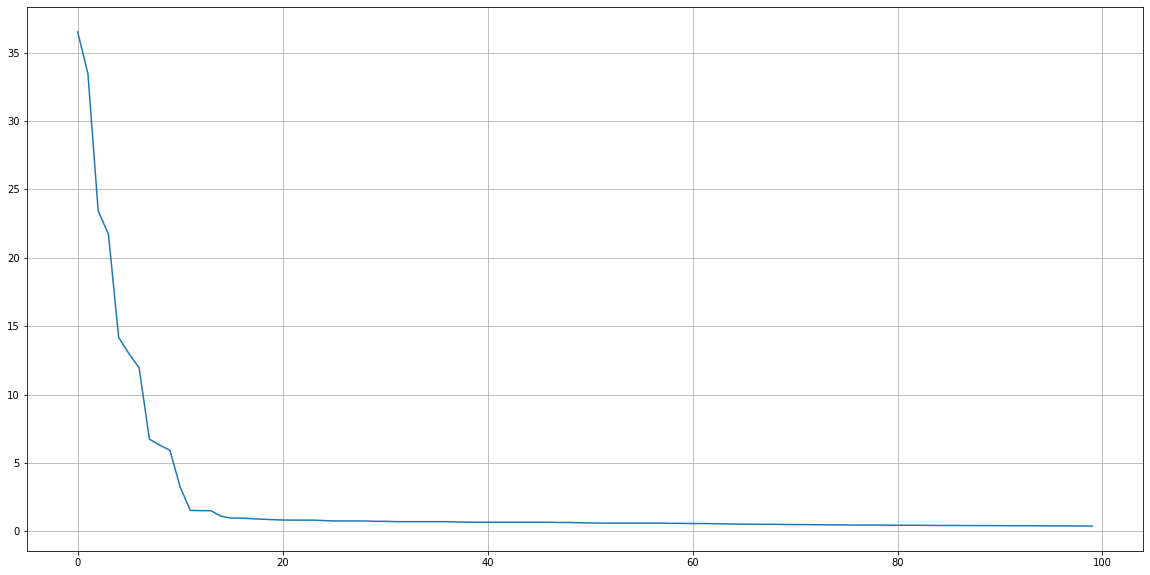

In [16]:
regression(1*x, y)

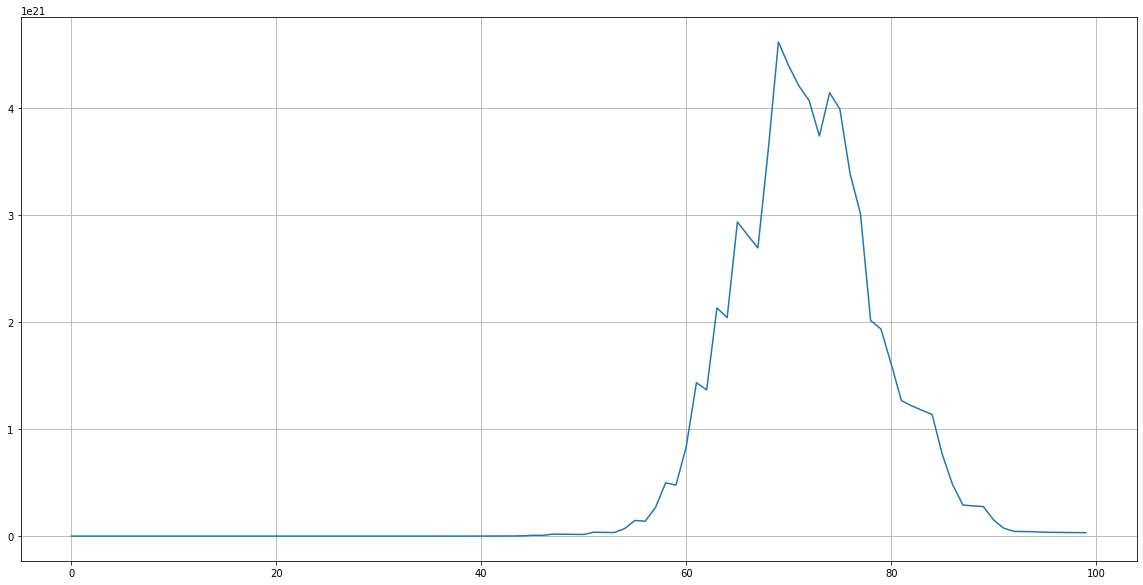

In [40]:
regression(1.5*x, y)

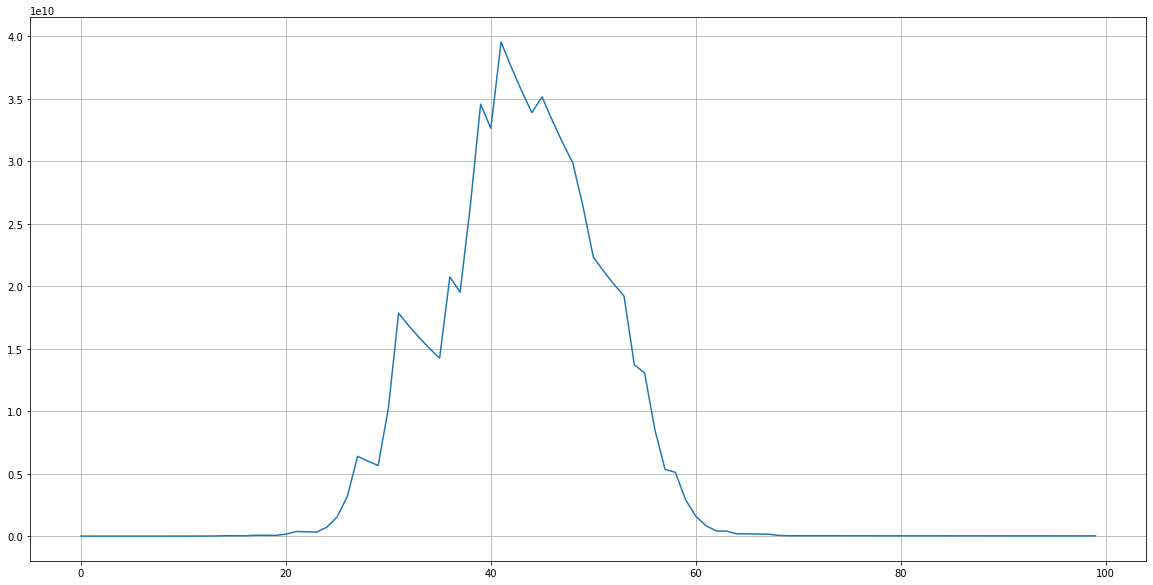

In [18]:
regression(1.3*x, y)

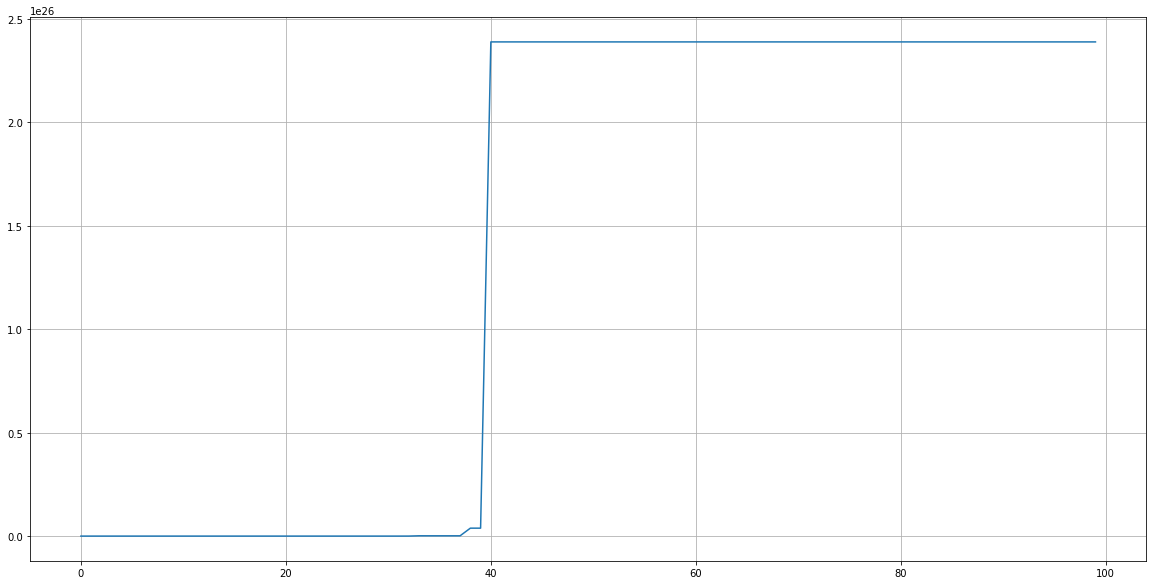

In [53]:
regression(2*x, 2*y)

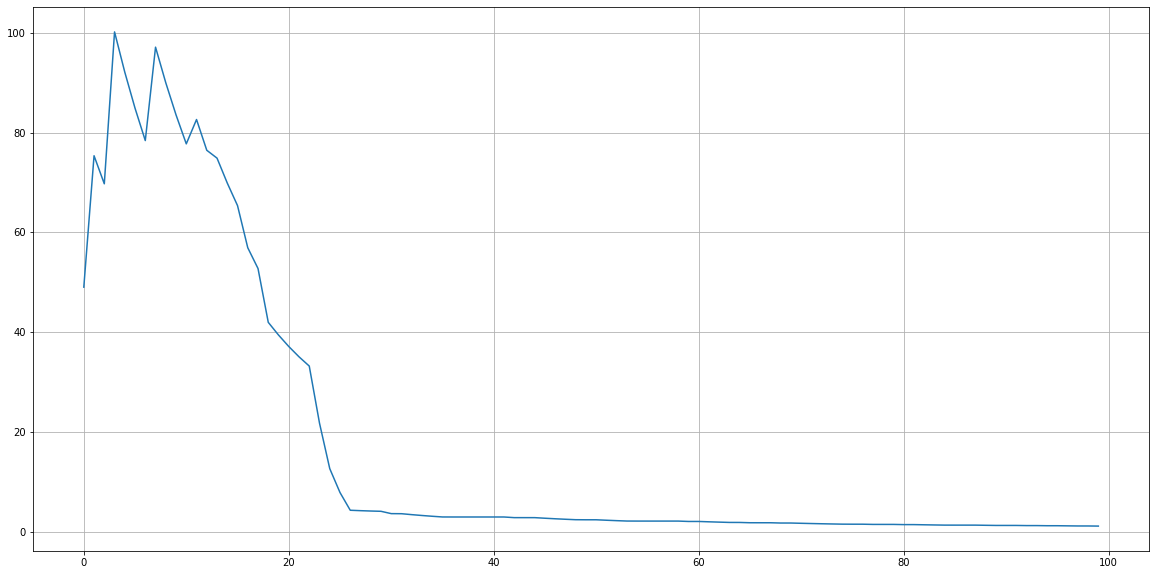

In [20]:
regression(1.1*x,y)